# Fake News Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datassist import explore

## Initial Exploration

In [2]:
df_news = pd.read_csv('data/news_articles (2).csv')

In [3]:
df_news.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [4]:
df_news.shape

(2096, 12)

In [5]:
explore.overview(df_news)

,NULL Count,NULL %,Unique Items,Type
author,0,0.0,491,object
published,0,0.0,2006,object
title,0,0.0,1784,object
text,46,2.2,1941,object
language,1,0.0,5,object
site_url,1,0.0,68,object
main_img_url,1,0.0,1229,object
type,1,0.0,8,object
label,1,0.0,2,object
title_without_stopwords,2,0.1,1780,object


- A lot of null rows, however they are a small proportion of the data set. 
- The language column will likely be dropped so this doesn't matter - we only need to check that the text is English
- Labels has one NULL which is no good

## NULLs

In [6]:
explore.find_null_rows(df_news, columns=['language'])

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2095,Eddy Lavine,2016-10-28T01:02:00.000+03:00,cannabis aficionados develop thca crystalline ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Started with language because it only has one NULL, however it seems that most of the features for this sample are NULL.
- This row will be dropped from the data

In [7]:
df_rows_with_nulls = explore.find_null_rows(df_news)

In [8]:
df_rows_with_nulls.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
374,Daniel Haiphong,2016-11-17T02:00:00.000+02:00,won now what,the syrian army and hezbollah resistance force...,english,ahtribune.com,http://ahtribune.com/images/media/Donald_Trump...,bs,Fake,NaN,syrian army hezbollah resistance forces contin...,1.0
2046,-NO AUTHOR-,2016-10-27T03:05:07.528+03:00,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,english,wnd.com,No Image URL,bias,Real,hillarys emails might missing,NaN,1.0
2047,Jerome R. Corsi,2016-10-27T03:05:08.609+03:00,youtube bans clintons black son,skype sex scam a fortune built on shame moroc...,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_shock...,bias,Real,hillarys emails might missing,NaN,1.0
2048,Leo Hohmann,2016-10-27T03:12:09.534+03:00,wikileaks bombshells on hillary you need to know,posted by eddie while the skyhigh potency may ...,english,wnd.com,http://mobile.wnd.com/files/2016/10/hillary_sh...,bias,Real,wikileaks bombshells hillary need know,NaN,1.0
2049,-NO AUTHOR-,2016-10-27T03:12:13.906+03:00,fascinated with sex,billion even after they are known to be keepin...,english,wnd.com,http://mobile.wnd.com/files/2015/10/Hillary-Cl...,bias,Real,fascinated sex,NaN,0.0


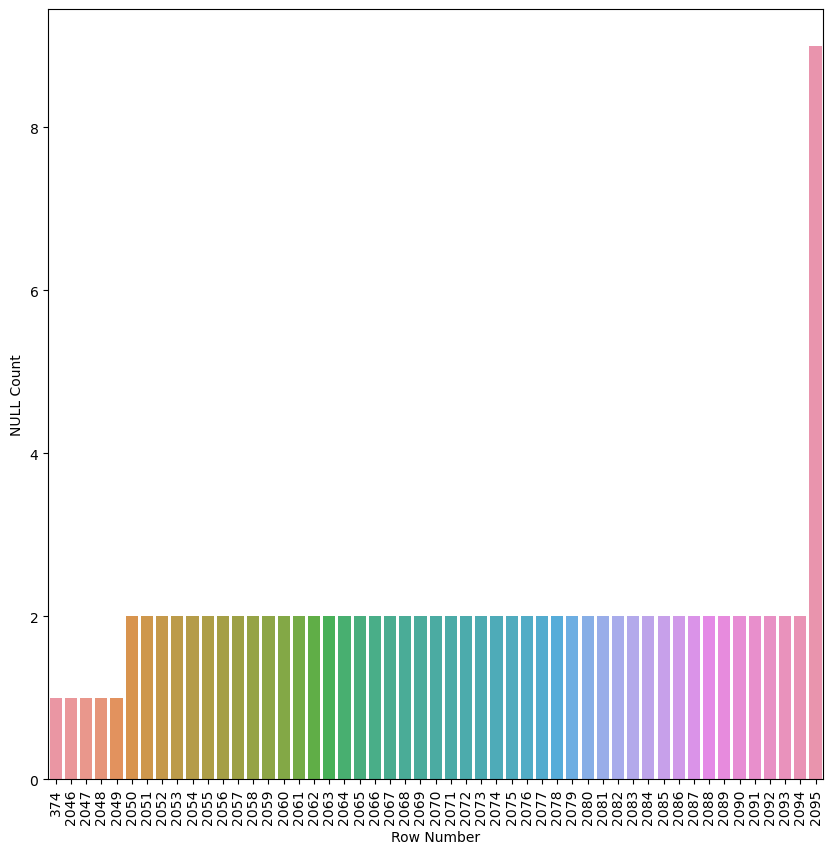

In [9]:
# Find the number of nulls per row
df_nulls_per_row = (df_news.shape[1] - df_rows_with_nulls.count(axis=1)) \
    .rename('NULL Count').to_frame() \
    .reset_index().rename(columns={'index':'Row Number'})

# Plot the results
fig = plt.figure(figsize=(10,10))
sns.barplot(data=df_nulls_per_row, x='Row Number', y='NULL Count')
plt.xticks(rotation=90)
plt.show()

- The bar chart shows that the rows typically have few NULL values (with the exception pf 2095 which will be dropped).
- It also shows that, bar 374, the NULLs are all in rows 2046 to 2095 (which is quite helpful)

In [10]:
df_rows_with_nulls.loc[2046:2094, :]

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2046,-NO AUTHOR-,2016-10-27T03:05:07.528+03:00,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,english,wnd.com,No Image URL,bias,Real,hillarys emails might missing,NaN,1.0
2047,Jerome R. Corsi,2016-10-27T03:05:08.609+03:00,youtube bans clintons black son,skype sex scam a fortune built on shame moroc...,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_shock...,bias,Real,hillarys emails might missing,NaN,1.0
2048,Leo Hohmann,2016-10-27T03:12:09.534+03:00,wikileaks bombshells on hillary you need to know,posted by eddie while the skyhigh potency may ...,english,wnd.com,http://mobile.wnd.com/files/2016/10/hillary_sh...,bias,Real,wikileaks bombshells hillary need know,NaN,1.0
2049,-NO AUTHOR-,2016-10-27T03:12:13.906+03:00,fascinated with sex,billion even after they are known to be keepin...,english,wnd.com,http://mobile.wnd.com/files/2015/10/Hillary-Cl...,bias,Real,fascinated sex,NaN,0.0
2050,-NO AUTHOR-,2016-10-27T03:19:40.578+03:00,hillarys emails might not be missing after all,NaN,english,wnd.com,No Image URL,bias,Real,meteor space junk rocket mysterious flash hits...,NaN,1.0
2051,-NO AUTHOR-,2016-10-27T03:32:23.580+03:00,hillarys emails might not be missing after all,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/meteor_russia...,bias,Real,democrats really stuff ballot heres answer,NaN,1.0
2052,Leo Hohmann,2016-10-27T03:32:35.039+03:00,wikileaks bombshells on hillary you need to know,NaN,english,wnd.com,http://mobile.wnd.com/files/2013/07/ballot-box...,bias,Real,men cry rape irans top quran reader,NaN,1.0
2053,-NO AUTHOR-,2016-10-27T03:32:37.291+03:00,fascinated with sex,NaN,english,wnd.com,http://mobile.wnd.com/files/2016/10/Saeed_Toos...,bias,Real,democrats really stuff ballot heres answer,NaN,1.0
2054,-NO AUTHOR-,2016-10-27T04:01:58.682+03:00,meteor space junk rocket mysterious flash hits...,NaN,english,wnd.com,http://www.wnd.com/files/2013/07/ballot-box-vo...,bias,Real,men cry rape irans top quran reader,NaN,1.0
2055,Greg Corombos,2016-10-27T04:07:06.853+03:00,did democrats really stuff ballot heres their ...,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/Saeed_Toosi.jpg,bias,Real,meteor space junk rocket mysterious flash hits...,NaN,1.0


- From examining this data, it seems that:
    1. The title and text "without_stopwords" appear that they are supposed to be the same, but with connectives (e.g. the, on, with) removed
    2. However, it seems that a lot of the "without_stopwords" features don't match their intended root (e.g. line 2045: `title`="gingrich slutshames megyn kelly" wheras `title_without_stopwords`="hillarys emails might missing"). 
    3. On all of the above samples, `text_without_stopwords` is NULL

It appears that the "without_stopwords" columns are some processed columns derived from `title` and `text`. These columns may be ignored since we should do our own processing of the text data later.

Check the without_stopwords columns match their root

In [11]:
# TODO

## Unique Items